In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
X,y = make_blobs(n_samples=1000,n_features=2,centers=7,cluster_std=1,random_state=82)

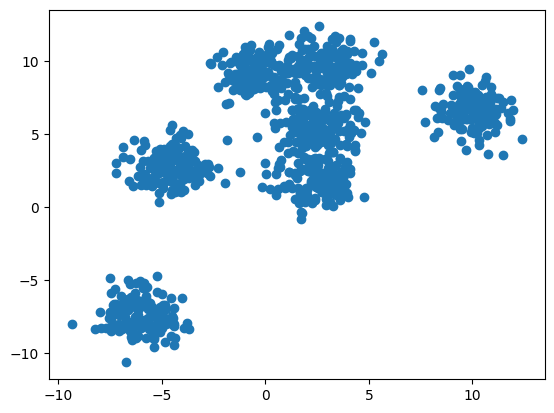

In [2]:
plt.scatter(X[:,0],X[:,1])

In [3]:
from kmeans_clustering import KMeans

In [4]:
kmeans_random = KMeans(n_clusters=7,n_init=2,init="random",max_iter=300)
result_random_my = []
inertia = []
for i in range(1000):
    kmeans_random.fit(X)
    inertia.append(round(kmeans_random.inertia_,0))
    if round(kmeans_random.inertia_,0) in (1942,1943):
        result_random_my.append(1)
    else:
        result_random_my.append(0)
print(np.unique(result_random_my,return_counts=True))
print((np.unique(inertia,return_counts=True)))

(array([0, 1]), array([402, 598]))
(array([1942., 2645., 2652., 2653., 2658., 2659., 2660., 2662., 2663.,
       2664., 2665., 2667., 2668., 2669., 2670., 2671., 2673., 2674.,
       2675., 2676., 2677., 2678., 2682., 2692., 2750., 2756., 2765.,
       2769., 2771., 2774., 3428., 3432., 3433., 3436., 3438., 3439.,
       3441., 3443., 3444., 3452., 3470., 3471., 3474., 3475., 3476.,
       3477., 3478., 3480., 3506., 3514.]), array([598,  19,  32,  12,  24,  46,   9,  14,  22,   3,  28,  35,  13,
         1,  18,  10,   1,  42,  13,   1,   1,   5,   9,   1,   1,   1,
         1,   1,   1,   1,  10,   3,   1,   1,   1,   1,   1,   1,   1,
         2,   1,   1,   1,   2,   3,   1,   2,   1,   2,   1]))


In [5]:
kmeans_plus = KMeans(n_clusters=7,n_init=2,init="k-means++",max_iter=300)
result_plus_my = []
inertia = []
for i in range(1000):

    kmeans_plus.fit(X)

    inertia.append(round(kmeans_plus.inertia_,0))

    if round(kmeans_plus.inertia_,0) in(1942,1943):
        result_plus_my.append(1)
    else:
        result_plus_my.append(0)
    
print(np.unique(result_plus_my,return_counts=True))
print((np.unique(inertia,return_counts=True)))

(array([0, 1]), array([280, 720]))
(array([1942., 2645., 2652., 2653., 2657., 2658., 2659., 2660., 2662.,
       2663., 2664., 2665., 2667., 2668., 2669., 2670., 2671., 2674.,
       2675., 2676., 2677., 2678., 2692., 2750., 2755., 3432., 3441.,
       3506.]), array([720,   7,  33,   8,   1,  20,  51,   9,  12,  19,   1,  20,  28,
         6,   4,  22,   6,  19,   3,   1,   1,   3,   1,   1,   1,   1,
         1,   1]))


C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_26768\766622682.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_26768\766622682.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])


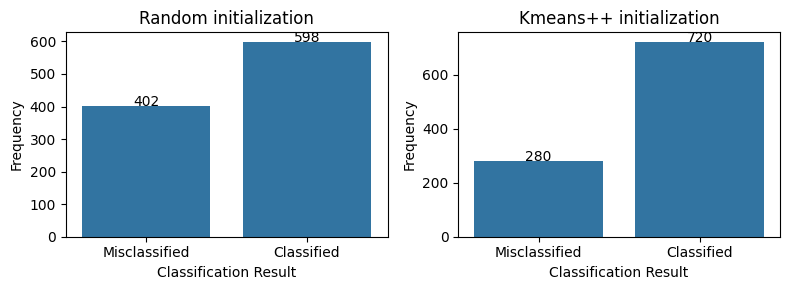

In [6]:
label_map = {'0': 'Misclassified', '1': 'Classified'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

sns.countplot(x=result_random_my, ax=ax1)
ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
ax1.set_xlabel("Classification Result")
ax1.set_ylabel("Frequency")
ax1.set_title("Random initialization")
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

sns.countplot(x=result_plus_my, ax=ax2)
ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])
ax2.set_xlabel("Classification Result")
ax2.set_ylabel("Frequency")
ax2.set_title("Kmeans++ initialization")
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

plt.tight_layout()
plt.show()


In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans_random = KMeans(n_clusters=7,n_init=2,init="random",max_iter=300)
kmeans_random.fit(X)
result_random_sk = []
inertia = []
for i in range(1000):
    kmeans_random.fit(X)
    inertia.append(round(kmeans_random.inertia_,0))
    if round(kmeans_random.inertia_,0) in (1942,1943):
        result_random_sk.append(1)
    else:
        result_random_sk.append(0)
print(np.unique(result_random_sk,return_counts=True))
print((np.unique(inertia,return_counts=True)))

(array([0, 1]), array([379, 621]))
(array([1942., 1943., 1944., 2644., 2645., 2647., 2648., 2652., 2653.,
       2657., 2658., 2659., 2660., 2661., 2662., 2663., 2664., 2665.,
       2666., 2667., 2668., 2669., 2670., 2671., 2672., 2674., 2675.,
       2676., 2677., 2678., 2679., 2681., 2682., 2683., 2685., 2692.,
       2713., 2768., 2769., 2773., 2776., 2781., 3429., 3432., 3433.,
       3434., 3435., 3438., 3439., 3443., 3444., 3452., 3474., 3475.,
       3476., 3477., 3478., 3506.]), array([398, 223,   2,   1,  11,   8,   1,  23,   7,   1,  22,  38,  14,
         2,   3,  29,   1,  25,   1,  41,  18,   1,  14,   8,   1,  27,
        16,   5,   1,   5,   4,   1,   2,   1,   1,   2,   1,   1,   1,
         1,   1,   1,   2,   2,   3,   4,   1,   3,   3,   1,   2,   1,
         4,   3,   1,   3,   1,   2]))


In [9]:
kmeans_plus = KMeans(n_clusters=7,n_init=2,init="k-means++",max_iter=300)
result_plus_sk = []
inertia = []
for i in range(1000):

    kmeans_plus.fit(X)

    inertia.append(round(kmeans_plus.inertia_,0))

    if round(kmeans_plus.inertia_,0) in (1942,1943):
        result_plus_sk.append(1)
    else:
        result_plus_sk.append(0)
    
print(np.unique(result_plus_sk,return_counts=True))
print((np.unique(inertia,return_counts=True)))

(array([0, 1]), array([ 46, 954]))
(array([1942., 1943., 1944., 2645., 2646., 2647., 2652., 2653., 2658.,
       2659., 2660., 2663., 2665., 2666., 2667., 2668., 2670., 2671.,
       2674., 2683.]), array([724, 230,   1,   1,   1,   2,   8,   3,   3,   4,   1,   8,   4,
         2,   2,   1,   2,   1,   1,   1]))


C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_26768\4112660895.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_26768\4112660895.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])


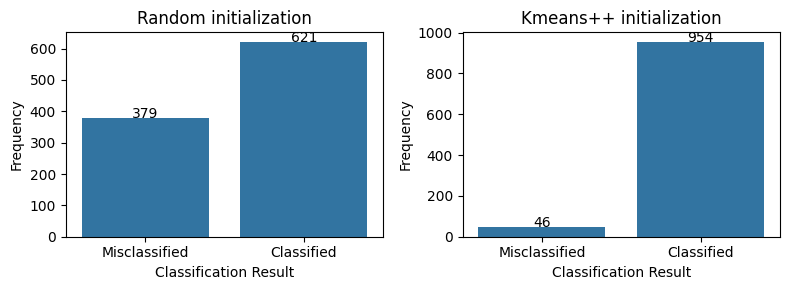

In [10]:
label_map = {'0': 'Misclassified', '1': 'Classified'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

sns.countplot(x=result_random_sk, ax=ax1)
ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
ax1.set_xlabel("Classification Result")
ax1.set_ylabel("Frequency")
ax1.set_title("Random initialization")
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

sns.countplot(x=result_plus_sk, ax=ax2)
ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])
ax2.set_xlabel("Classification Result")
ax2.set_ylabel("Frequency")
ax2.set_title("Kmeans++ initialization")
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

plt.tight_layout()
plt.show()


C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_26768\3397069533.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_26768\3397069533.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])
C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_26768\3397069533.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([label_map[x.get_text()] for x in ax3.get_xticklabels()])
C:\Users\Shafi Ullah\AppData\Local\Temp\ipykernel_26768\3397069533.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i

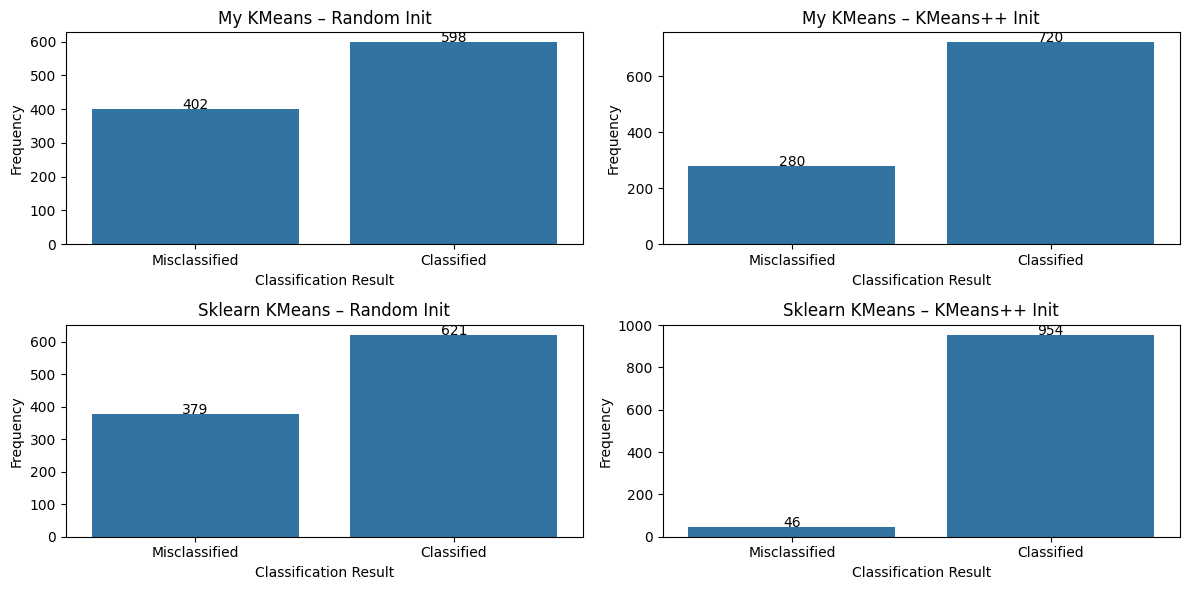

In [11]:

label_map = {'0': 'Misclassified', '1': 'Classified'}

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
(ax1, ax2), (ax3, ax4) = axes

# My KMeans - Random initialization
sns.countplot(x=result_random_my, ax=ax1)
ax1.set_xticklabels([label_map[x.get_text()] for x in ax1.get_xticklabels()])
ax1.set_xlabel("Classification Result")
ax1.set_ylabel("Frequency")
ax1.set_title("My KMeans – Random Init")
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

# My KMeans – KMeans++ initialization
sns.countplot(x=result_plus_my, ax=ax2)
ax2.set_xticklabels([label_map[x.get_text()] for x in ax2.get_xticklabels()])
ax2.set_xlabel("Classification Result")
ax2.set_ylabel("Frequency")
ax2.set_title("My KMeans – KMeans++ Init")
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

# Sklearn KMeans – Random initialization
sns.countplot(x=result_random_sk, ax=ax3)
ax3.set_xticklabels([label_map[x.get_text()] for x in ax3.get_xticklabels()])
ax3.set_xlabel("Classification Result")
ax3.set_ylabel("Frequency")
ax3.set_title("Sklearn KMeans – Random Init")
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

# Sklearn KMeans – KMeans++ initialization
sns.countplot(x=result_plus_sk, ax=ax4)
ax4.set_xticklabels([label_map[x.get_text()] for x in ax4.get_xticklabels()])
ax4.set_xlabel("Classification Result")
ax4.set_ylabel("Frequency")
ax4.set_title("Sklearn KMeans – KMeans++ Init")
for p in ax4.patches:
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha="center")

plt.tight_layout()
plt.show()
